In [2]:
pip install pandas

Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.


In [3]:

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime
import warnings
warnings.filterwarnings('ignore')

# Set display options for better data viewing
pd.set_option('display.max_columns', None)
pd.set_option('display.width', None)

print("🚗 Welcome to Uber Fares Data Analysis!")
print("=" * 50)

🚗 Welcome to Uber Fares Data Analysis!


In [6]:

df = pd.read_csv('uber.csv')

# Show first 5 rows
df.head()


,Unnamed: 0,key,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count
0,24238194,2015-05-07 19:52:06.0000003,7.5,2015-05-07 19:52:06 UTC,-73.999817,40.738354,-73.999512,40.723217,1
1,27835199,2009-07-17 20:04:56.0000002,7.7,2009-07-17 20:04:56 UTC,-73.994355,40.728225,-73.994710,40.750325,1
2,44984355,2009-08-24 21:45:00.00000061,12.9,2009-08-24 21:45:00 UTC,-74.005043,40.740770,-73.962565,40.772647,1
3,25894730,2009-06-26 08:22:21.0000001,5.3,2009-06-26 08:22:21 UTC,-73.976124,40.790844,-73.965316,40.803349,3
4,17610152,2014-08-28 17:47:00.000000188,16.0,2014-08-28 17:47:00 UTC,-73.925023,40.744085,-73.973082,40.761247,5


In [7]:
print("\n📊 DATASET OVERVIEW")
print("=" * 30)
print(f"Dataset shape: {df.shape}")
print(f"Number of rides: {df.shape[0]:,}")
print(f"Number of features: {df.shape[1]}")

print("\n📋 COLUMN INFORMATION")
print("=" * 30)
print(df.info())

print("\n🔍 FIRST 5 ROWS")
print("=" * 30)
print(df.head())

print("\n📈 BASIC STATISTICS")
print("=" * 30)
print(df.describe())



📊 DATASET OVERVIEW
Dataset shape: (200000, 9)
Number of rides: 200,000
Number of features: 9

📋 COLUMN INFORMATION
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200000 entries, 0 to 199999
Data columns (total 9 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   Unnamed: 0         200000 non-null  int64  
 1   key                200000 non-null  object 
 2   fare_amount        200000 non-null  float64
 3   pickup_datetime    200000 non-null  object 
 4   pickup_longitude   200000 non-null  float64
 5   pickup_latitude    200000 non-null  float64
 6   dropoff_longitude  199999 non-null  float64
 7   dropoff_latitude   199999 non-null  float64
 8   passenger_count    200000 non-null  int64  
dtypes: float64(5), int64(2), object(2)
memory usage: 13.7+ MB
None

🔍 FIRST 5 ROWS
   Unnamed: 0                            key  fare_amount  \
0    24238194    2015-05-07 19:52:06.0000003          7.5   
1    27835199    2009-07-17 2

In [10]:
print("\n🔍 DATA QUALITY CHECK")
print("=" * 30)

# Check for missing values
missing_values = df.isnull().sum()
print("Missing values per column:")
for col, missing in missing_values.items():
    if missing > 0:
        percentage = (missing / len(df)) * 100
        print(f"  {col}: {missing} ({percentage:.4f}%)")
    else:
        print(f"  {col}: 0 (0.0%)")


🔍 DATA QUALITY CHECK
Missing values per column:
  Unnamed: 0: 0 (0.0%)
  key: 0 (0.0%)
  fare_amount: 0 (0.0%)
  pickup_datetime: 0 (0.0%)
  pickup_longitude: 0 (0.0%)
  pickup_latitude: 0 (0.0%)
  dropoff_longitude: 1 (0.0005%)
  dropoff_latitude: 1 (0.0005%)
  passenger_count: 0 (0.0%)


In [11]:

# Check data types
print(f"\nData types:")
for col, dtype in df.dtypes.items():
    print(f"  {col}: {dtype}")

print("\n✅ Initial data exploration complete!")


Data types:
  Unnamed: 0: int64
  key: object
  fare_amount: float64
  pickup_datetime: object
  pickup_longitude: float64
  pickup_latitude: float64
  dropoff_longitude: float64
  dropoff_latitude: float64
  passenger_count: int64

✅ Initial data exploration complete!


In [13]:
# Data Cleaning and Preparation

print("\n🧹 STARTING DATA CLEANING")
print("=" * 40)

# Making a copy of original data
df_original = df.copy()
df_clean = df.copy()

print(f"Original dataset shape: {df_clean.shape}")

# Handling missing values
print("\n🔧 Handling Missing Values...")

# Removing any rows with missing fare amounts
if 'fare_amount' in df_clean.columns:
    before_fare = len(df_clean)
    df_clean = df_clean.dropna(subset=['fare_amount'])
    after_fare = len(df_clean)
    print(f"  Removed {before_fare - after_fare} rows with missing fare amounts")



🧹 STARTING DATA CLEANING
Original dataset shape: (200000, 9)

🔧 Handling Missing Values...
  Removed 0 rows with missing fare amounts


In [14]:
# Removing any rows with missing coordinates
coordinate_cols = ['pickup_longitude', 'pickup_latitude', 'dropoff_longitude', 'dropoff_latitude']
existing_coord_cols = [col for col in coordinate_cols if col in df_clean.columns]

if existing_coord_cols:
    before_coords = len(df_clean)
    df_clean = df_clean.dropna(subset=existing_coord_cols)
    after_coords = len(df_clean)
    print(f"  Removed {before_coords - after_coords} rows with missing coordinates")


  Removed 1 rows with missing coordinates


In [17]:
# Fill missing passenger count with most common value
if 'passenger_count' in df_clean.columns:
    if df_clean['passenger_count'].isnull().sum() > 0:
        most_common_passengers = df_clean['passenger_count'].mode()[0]
        df_clean['passenger_count'].fillna(most_common_passengers, inplace=True)
        print(f"  Filled missing passenger counts with {most_common_passengers}")

print(f"Dataset shape after cleaning missing values: {df_clean.shape}")

Dataset shape after cleaning missing values: (199999, 9)


In [18]:
# Remove unrealistic values
print("\n🚫 Removing Unrealistic Values...")

original_size = len(df_clean)

# Remove negative or zero fares
if 'fare_amount' in df_clean.columns:
    df_clean = df_clean[df_clean['fare_amount'] > 0]
    print(f"  Removed rides with fare ≤ 0")


🚫 Removing Unrealistic Values...
  Removed rides with fare ≤ 0


In [20]:
# Remove extremely high fares
if 'fare_amount' in df_clean.columns:
    fare_99th = df_clean['fare_amount'].quantile(0.99)
    df_clean = df_clean[df_clean['fare_amount'] <= fare_99th]
    print(f"  Removed rides with fare > ${fare_99th:.2f} (99th percentile)")


  Removed rides with fare > $47.83 (99th percentile)


In [21]:
# Remove invalid passenger counts
if 'passenger_count' in df_clean.columns:
    df_clean = df_clean[(df_clean['passenger_count'] >= 1) & (df_clean['passenger_count'] <= 6)]
    print(f"  Kept only rides with 1-6 passengers")


  Kept only rides with 1-6 passengers


In [22]:
# Remove rides with pickup = dropoff (same location)
if all(col in df_clean.columns for col in ['pickup_longitude', 'pickup_latitude', 'dropoff_longitude', 'dropoff_latitude']):
    same_location = (
        (df_clean['pickup_longitude'] == df_clean['dropoff_longitude']) & 
        (df_clean['pickup_latitude'] == df_clean['dropoff_latitude'])
    )
    df_clean = df_clean[~same_location]
    print(f"  Removed rides with same pickup/dropoff location")

  Removed rides with same pickup/dropoff location


In [23]:
print(f"Removed {original_size - len(df_clean)} unrealistic records")
print(f"Final cleaned dataset shape: {df_clean.shape}")

Removed 10127 unrealistic records
Final cleaned dataset shape: (189872, 9)


In [33]:
print(df_clean.columns)

Index(['Unnamed: 0', 'key', 'fare_amount', 'pickup_datetime',
       'pickup_longitude', 'pickup_latitude', 'dropoff_longitude',
       'dropoff_latitude', 'passenger_count'],
      dtype='object')


In [34]:
# Drop the broken 'key' column (contains broken time values)
df_clean.drop(columns=['key'], inplace=True)

In [35]:
# Rename the correct unnamed column to 'key'
df_clean.rename(columns={'Unnamed: 0': 'key'}, inplace=True)

In [36]:
print(df_clean.columns)
df_clean.head()

Index(['key', 'fare_amount', 'pickup_datetime', 'pickup_longitude',
       'pickup_latitude', 'dropoff_longitude', 'dropoff_latitude',
       'passenger_count'],
      dtype='object')


,key,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count
0,24238194,7.5,2015-05-07 19:52:06 UTC,-73.999817,40.738354,-73.999512,40.723217,1
1,27835199,7.7,2009-07-17 20:04:56 UTC,-73.994355,40.728225,-73.994710,40.750325,1
2,44984355,12.9,2009-08-24 21:45:00 UTC,-74.005043,40.740770,-73.962565,40.772647,1
3,25894730,5.3,2009-06-26 08:22:21 UTC,-73.976124,40.790844,-73.965316,40.803349,3
4,17610152,16.0,2014-08-28 17:47:00 UTC,-73.925023,40.744085,-73.973082,40.761247,5


In [37]:
# Convert pickup_datetime to datetime format
df_clean['pickup_datetime'] = pd.to_datetime(df_clean['pickup_datetime'])

In [38]:
df_clean.dtypes

key                                int64
fare_amount                      float64
pickup_datetime      datetime64[ns, UTC]
pickup_longitude                 float64
pickup_latitude                  float64
dropoff_longitude                float64
dropoff_latitude                 float64
passenger_count                    int64
dtype: object

In [39]:
# Export cleaned dataset
print("\n💾 Exporting Cleaned Dataset...")

# Save cleaned dataset
output_filename = 'uber_data_cleaned.csv'
df_clean.to_csv(output_filename, index=False)
print(f"✅ Cleaned dataset saved as '{output_filename}'")


💾 Exporting Cleaned Dataset...
✅ Cleaned dataset saved as 'uber_data_cleaned.csv'


In [40]:
# Summary of cleaning
print("\n📊 CLEANING SUMMARY")
print("=" * 30)
print(f"Original records: {len(df_original):,}")
print(f"Cleaned records: {len(df_clean):,}")
print(f"Records removed: {len(df_original) - len(df_clean):,}")
print(f"Data retention: {(len(df_clean)/len(df_original)*100):.1f}%")

print("\n✅ Data cleaning complete! Ready for analysis.")


📊 CLEANING SUMMARY
Original records: 200,000
Cleaned records: 189,872
Records removed: 10,128
Data retention: 94.9%

✅ Data cleaning complete! Ready for analysis.


In [41]:
# Exploratory Data Analysis (EDA)

print("\n🔍 STARTING EXPLORATORY DATA ANALYSIS")
print("=" * 50)

# Set up plotting style
plt.style.use('seaborn-v0_8')
fig_size = (12, 8)

# Step 2a: Generate descriptive statistics
print("\n📊 DESCRIPTIVE STATISTICS")
print("=" * 35)

# Numerical columns only
numerical_cols = df_clean.select_dtypes(include=[np.number]).columns
print("Numerical columns found:", list(numerical_cols))



🔍 STARTING EXPLORATORY DATA ANALYSIS

📊 DESCRIPTIVE STATISTICS
Numerical columns found: ['key', 'fare_amount', 'pickup_longitude', 'pickup_latitude', 'dropoff_longitude', 'dropoff_latitude', 'passenger_count']


In [42]:
for col in numerical_cols:
    if col in df_clean.columns:
        print(f"\n📈 {col.upper()} STATISTICS:")
        print(f"  Mean: ${df_clean[col].mean():.2f}" if 'fare' in col.lower() or 'amount' in col.lower() else f"  Mean: {df_clean[col].mean():.2f}")
        print(f"  Median: ${df_clean[col].median():.2f}" if 'fare' in col.lower() or 'amount' in col.lower() else f"  Median: {df_clean[col].median():.2f}")
        
        # Mode (most frequent value)
        try:
            mode_val = df_clean[col].mode()[0]
            print(f"  Mode: ${mode_val:.2f}" if 'fare' in col.lower() or 'amount' in col.lower() else f"  Mode: {mode_val:.2f}")
        except:
            print("  Mode: N/A")
        
        print(f"  Std Dev: {df_clean[col].std():.2f}")
        print(f"  Min: ${df_clean[col].min():.2f}" if 'fare' in col.lower() or 'amount' in col.lower() else f"  Min: {df_clean[col].min():.2f}")
        print(f"  Max: ${df_clean[col].max():.2f}" if 'fare' in col.lower() or 'amount' in col.lower() else f"  Max: {df_clean[col].max():.2f}")
        
        # Quartiles
        q1 = df_clean[col].quantile(0.25)
        q3 = df_clean[col].quantile(0.75)
        iqr = q3 - q1
        print(f"  Q1 (25%): {q1:.2f}")
        print(f"  Q3 (75%): {q3:.2f}")
        print(f"  IQR: {iqr:.2f}")
        
        # Outliers using IQR method
        lower_bound = q1 - 1.5 * iqr
        upper_bound = q3 + 1.5 * iqr
        outliers = df_clean[(df_clean[col] < lower_bound) | (df_clean[col] > upper_bound)]
        print(f"  Outliers: {len(outliers)} ({len(outliers)/len(df_clean)*100:.1f}%)")



📈 KEY STATISTICS:
  Mean: 27710573.29
  Median: 27743031.00
  Mode: 1.00
  Std Dev: 16007837.44
  Min: 1.00
  Max: 55423567.00
  Q1 (25%): 13828118.00
  Q3 (75%): 41535828.00
  IQR: 27707710.00
  Outliers: 0 (0.0%)

📈 FARE_AMOUNT STATISTICS:
  Mean: $10.45
  Median: $8.50
  Mode: $6.50
  Std Dev: 7.04
  Min: $0.01
  Max: $47.83
  Q1 (25%): 6.00
  Q3 (75%): 12.10
  IQR: 6.10
  Outliers: 14275 (7.5%)

📈 PICKUP_LONGITUDE STATISTICS:
  Mean: -73.86
  Median: -73.98
  Mode: 0.00
  Std Dev: 5.98
  Min: -1340.65
  Max: 57.42
  Q1 (25%): -73.99
  Q3 (75%): -73.97
  IQR: 0.02
  Outliers: 7780 (4.1%)

📈 PICKUP_LATITUDE STATISTICS:
  Mean: 40.67
  Median: 40.75
  Mode: 0.00
  Std Dev: 5.62
  Min: -74.02
  Max: 1644.42
  Q1 (25%): 40.74
  Q3 (75%): 40.77
  IQR: 0.03
  Outliers: 4414 (2.3%)

📈 DROPOFF_LONGITUDE STATISTICS:
  Mean: -73.86
  Median: -73.98
  Mode: 0.00
  Std Dev: 8.88
  Min: -3356.67
  Max: 1153.57
  Q1 (25%): -73.99
  Q3 (75%): -73.97
  IQR: 0.03
  Outliers: 9250 (4.9%)

📈 DROPOFF_


📊 CREATING VISUALIZATIONS...


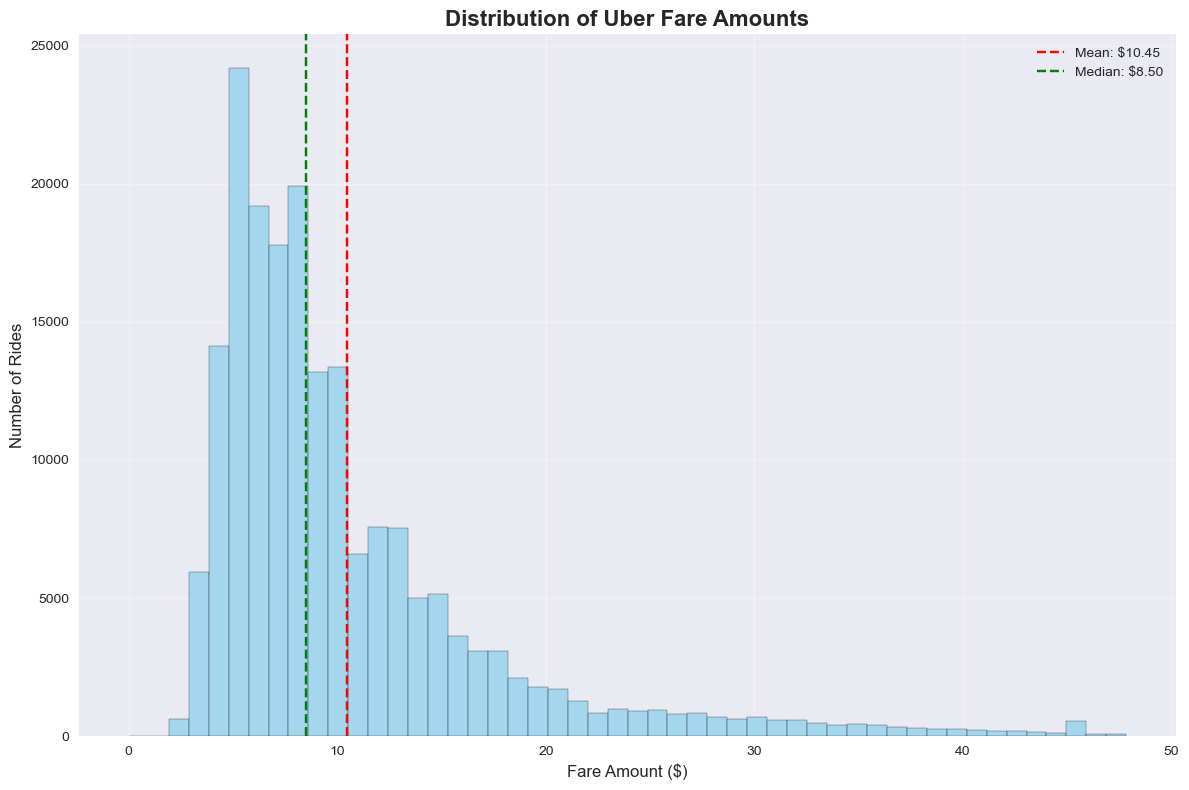

  ✅ Fare distribution plot saved as 'fare_distribution.png'


In [43]:

# Visualizations showing fare distribution patterns
print("\n📊 CREATING VISUALIZATIONS...")

# 1. Fare Distribution Histogram
if 'fare_amount' in df_clean.columns:
    plt.figure(figsize=fig_size)
    plt.hist(df_clean['fare_amount'], bins=50, alpha=0.7, color='skyblue', edgecolor='black')
    plt.title('Distribution of Uber Fare Amounts', fontsize=16, fontweight='bold')
    plt.xlabel('Fare Amount ($)', fontsize=12)
    plt.ylabel('Number of Rides', fontsize=12)
    plt.grid(True, alpha=0.3)
    
    # Add statistics text
    mean_fare = df_clean['fare_amount'].mean()
    median_fare = df_clean['fare_amount'].median()
    plt.axvline(mean_fare, color='red', linestyle='--', label=f'Mean: ${mean_fare:.2f}')
    plt.axvline(median_fare, color='green', linestyle='--', label=f'Median: ${median_fare:.2f}')
    plt.legend()
    
    plt.tight_layout()
    plt.savefig('fare_distribution.png', dpi=300, bbox_inches='tight')
    plt.show()
    print("  ✅ Fare distribution plot saved as 'fare_distribution.png'")


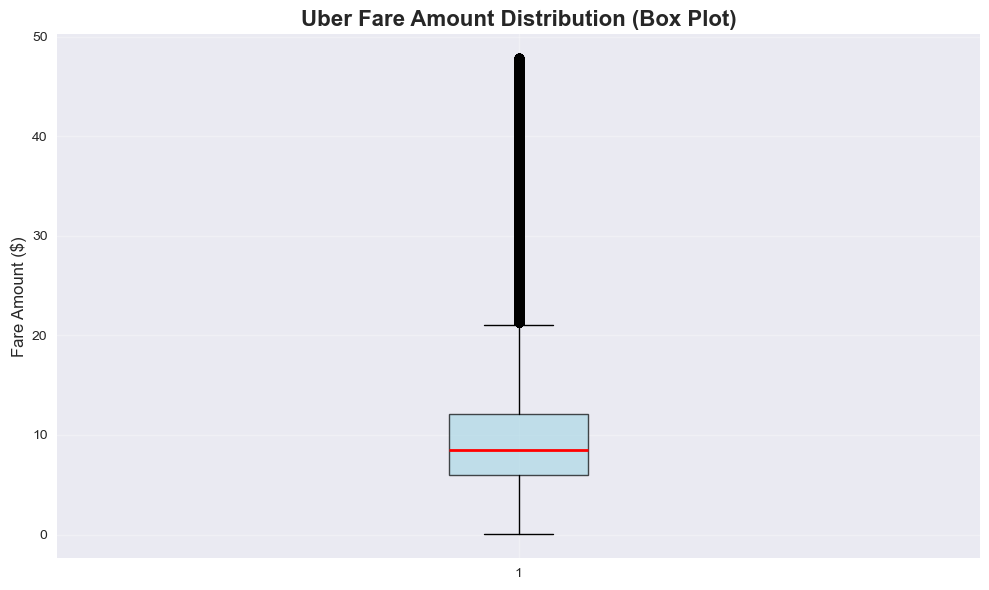

  ✅ Fare box plot saved as 'fare_boxplot.png'


In [44]:

# 2. Box Plot for Fare Distribution
if 'fare_amount' in df_clean.columns:
    plt.figure(figsize=(10, 6))
    plt.boxplot(df_clean['fare_amount'], vert=True, patch_artist=True,
                boxprops=dict(facecolor='lightblue', alpha=0.7),
                medianprops=dict(color='red', linewidth=2))
    plt.title('Uber Fare Amount Distribution (Box Plot)', fontsize=16, fontweight='bold')
    plt.ylabel('Fare Amount ($)', fontsize=12)
    plt.grid(True, alpha=0.3)
    plt.tight_layout()
    plt.savefig('fare_boxplot.png', dpi=300, bbox_inches='tight')
    plt.show()
    print("  ✅ Fare box plot saved as 'fare_boxplot.png'")

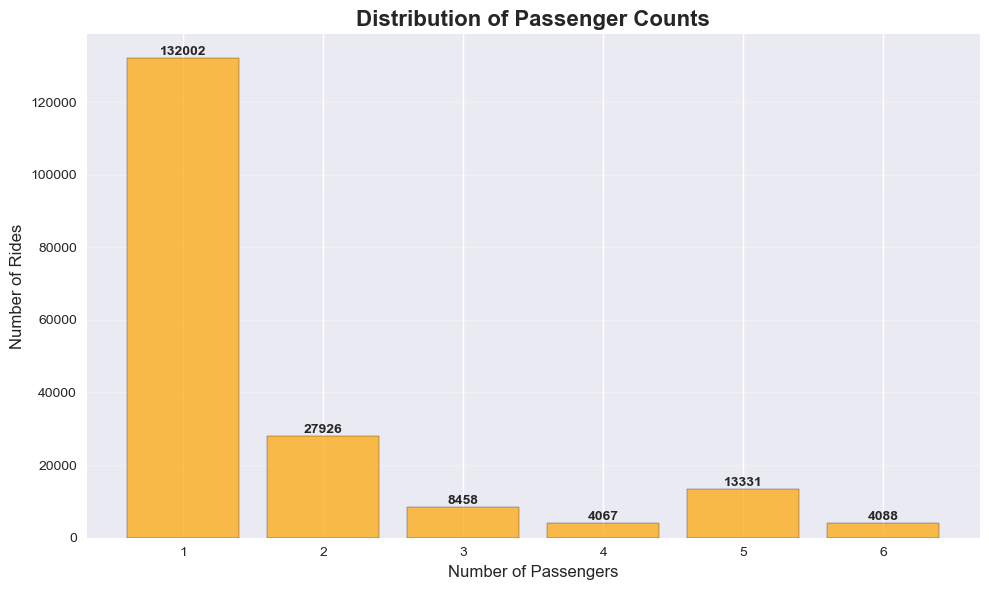

  ✅ Passenger count distribution saved as 'passenger_distribution.png'

✅ Basic EDA visualizations complete!
📁 Files saved: fare_distribution.png, fare_boxplot.png, passenger_distribution.png


In [45]:
# 3. Passenger Count Distribution
if 'passenger_count' in df_clean.columns:
    plt.figure(figsize=(10, 6))
    passenger_counts = df_clean['passenger_count'].value_counts().sort_index()
    bars = plt.bar(passenger_counts.index, passenger_counts.values, 
                   color='orange', alpha=0.7, edgecolor='black')
    
    # Add value labels on bars
    for bar in bars:
        height = bar.get_height()
        plt.text(bar.get_x() + bar.get_width()/2., height + 10,
                f'{int(height)}', ha='center', va='bottom', fontweight='bold')
    
    plt.title('Distribution of Passenger Counts', fontsize=16, fontweight='bold')
    plt.xlabel('Number of Passengers', fontsize=12)
    plt.ylabel('Number of Rides', fontsize=12)
    plt.grid(True, alpha=0.3, axis='y')
    plt.tight_layout()
    plt.savefig('passenger_distribution.png', dpi=300, bbox_inches='tight')
    plt.show()
    print("  ✅ Passenger count distribution saved as 'passenger_distribution.png'")

print("\n✅ Basic EDA visualizations complete!")
print("📁 Files saved: fare_distribution.png, fare_boxplot.png, passenger_distribution.png")

In [46]:
# Correlation Analysis and Feature Engineering

print("\n🔗 Adding Trip Distance Feature")

# Check if we have the required coordinate columns
if all(col in df_clean.columns for col in ['pickup_longitude', 'pickup_latitude', 'dropoff_longitude', 'dropoff_latitude']):
    
    # Calculate a simple distance estimate (not using real Earth curve)
    df_clean['trip_distance'] = np.sqrt(
        (df_clean['dropoff_latitude'] - df_clean['pickup_latitude'])**2 +
        (df_clean['dropoff_longitude'] - df_clean['pickup_longitude'])**2
    ) * 69  # 1 degree ≈ 69 miles

    print(f"✅ trip_distance column added! Example distance: {df_clean['trip_distance'].iloc[0]:.2f} miles")
else:
    print("⚠️ Coordinate columns not found — skipping trip distance calculation.")


🔗 Adding Trip Distance Feature
✅ trip_distance column added! Example distance: 1.04 miles


In [47]:
# Step 3: Feature Engineering
print("\n🔧 FEATURE ENGINEERING")
print("=" * 30)

# Find datetime column for feature extraction
datetime_col = None
for col in df_clean.columns:
    if pd.api.types.is_datetime64_any_dtype(df_clean[col]):
        datetime_col = col
        break

if datetime_col:
    print(f"📅 Using {datetime_col} for time-based features...")
    
    # Extract time-based features
    df_clean['hour'] = df_clean[datetime_col].dt.hour
    df_clean['day_of_week'] = df_clean[datetime_col].dt.dayofweek  # Monday=0, Sunday=6
    df_clean['day_name'] = df_clean[datetime_col].dt.day_name()
    df_clean['month'] = df_clean[datetime_col].dt.month
    df_clean['year'] = df_clean[datetime_col].dt.year
    
    # Peak hours feature (7-9 AM and 5-7 PM are typically peak)
    df_clean['is_peak_hour'] = ((df_clean['hour'] >= 7) & (df_clean['hour'] <= 9)) | \
                               ((df_clean['hour'] >= 17) & (df_clean['hour'] <= 19))
    
    # Weekend feature
    df_clean['is_weekend'] = df_clean['day_of_week'] >= 5  # Saturday=5, Sunday=6
    
    print("  ✅ Added: hour, day_of_week, day_name, month, year")
    print("  ✅ Added: is_peak_hour, is_weekend")
    
    # Time of day categories
    def get_time_period(hour):
        if 5 <= hour < 12:
            return 'Morning'
        elif 12 <= hour < 17:
            return 'Afternoon'
        elif 17 <= hour < 22:
            return 'Evening'
        else:
            return 'Night'
    
    df_clean['time_period'] = df_clean['hour'].apply(get_time_period)
    print("  ✅ Added: time_period (Morning/Afternoon/Evening/Night)")
    
else:
    print("❌ No datetime column found - skipping time-based features")

# Calculate fare per mile if we have distance
if 'trip_distance' in df_clean.columns and 'fare_amount' in df_clean.columns:
    # Avoid division by zero
    df_clean['fare_per_mile'] = df_clean['fare_amount'] / (df_clean['trip_distance'] + 0.001)
    # Cap extreme values
    df_clean['fare_per_mile'] = df_clean['fare_per_mile'].clip(0, 50)
    print("  ✅ Added: fare_per_mile")


🔧 FEATURE ENGINEERING
📅 Using pickup_datetime for time-based features...
  ✅ Added: hour, day_of_week, day_name, month, year
  ✅ Added: is_peak_hour, is_weekend
  ✅ Added: time_period (Morning/Afternoon/Evening/Night)
  ✅ Added: fare_per_mile



🔗 ANALYZING VARIABLE RELATIONSHIPS


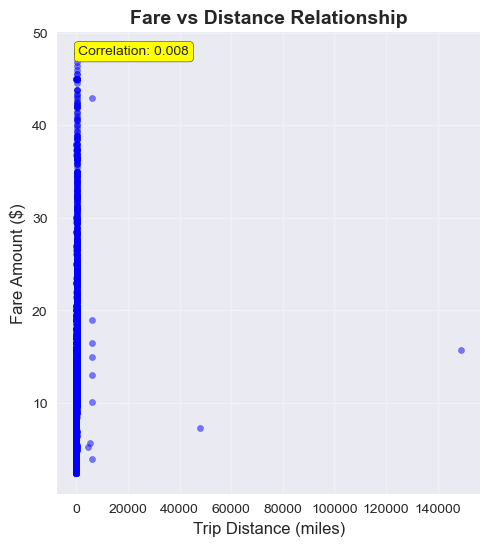

In [53]:
# Analyze relationships between key variables
print("\n🔗 ANALYZING VARIABLE RELATIONSHIPS")
print("=" * 40)

# 1. Fare vs Distance (if available)
if 'trip_distance' in df_clean.columns and 'fare_amount' in df_clean.columns:
    plt.figure(figsize=(12, 6))
    
    # Create scatter plot
    plt.subplot(1, 2, 1)
    # Sample data for better visibility if dataset is large
    sample_size = min(5000, len(df_clean))
    sample_df = df_clean.sample(sample_size)
    
    plt.scatter(sample_df['trip_distance'], sample_df['fare_amount'], 
                alpha=0.5, color='blue', s=20)
    plt.xlabel('Trip Distance (miles)', fontsize=12)
    plt.ylabel('Fare Amount ($)', fontsize=12)
    plt.title('Fare vs Distance Relationship', fontsize=14, fontweight='bold')
    plt.grid(True, alpha=0.3)
    
    # Calculate correlation
    correlation = df_clean['trip_distance'].corr(df_clean['fare_amount'])
    plt.text(0.05, 0.95, f'Correlation: {correlation:.3f}', 
             transform=plt.gca().transAxes, bbox=dict(boxstyle="round,pad=0.3", facecolor="yellow"))

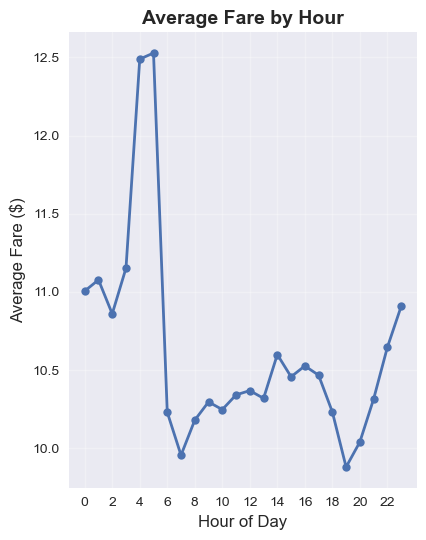

  ✅ Relationship analysis saved as 'fare_relationships.png'


In [57]:
# 2. Fare vs Hour of Day
plt.subplot(1, 2, 2)
if 'hour' in df_clean.columns:
    hourly_fares = df_clean.groupby('hour')['fare_amount'].mean()
    plt.plot(hourly_fares.index, hourly_fares.values, marker='o', linewidth=2, markersize=6)
    plt.xlabel('Hour of Day', fontsize=12)
    plt.ylabel('Average Fare ($)', fontsize=12)
    plt.title('Average Fare by Hour', fontsize=14, fontweight='bold')
    plt.grid(True, alpha=0.3)
    plt.xticks(range(0, 24, 2))
    
    plt.tight_layout()
    plt.savefig('fare_relationships.png', dpi=300, bbox_inches='tight')
    plt.show()
    print("  ✅ Relationship analysis saved as 'fare_relationships.png'")



🌡️ Creating correlation heatmap...


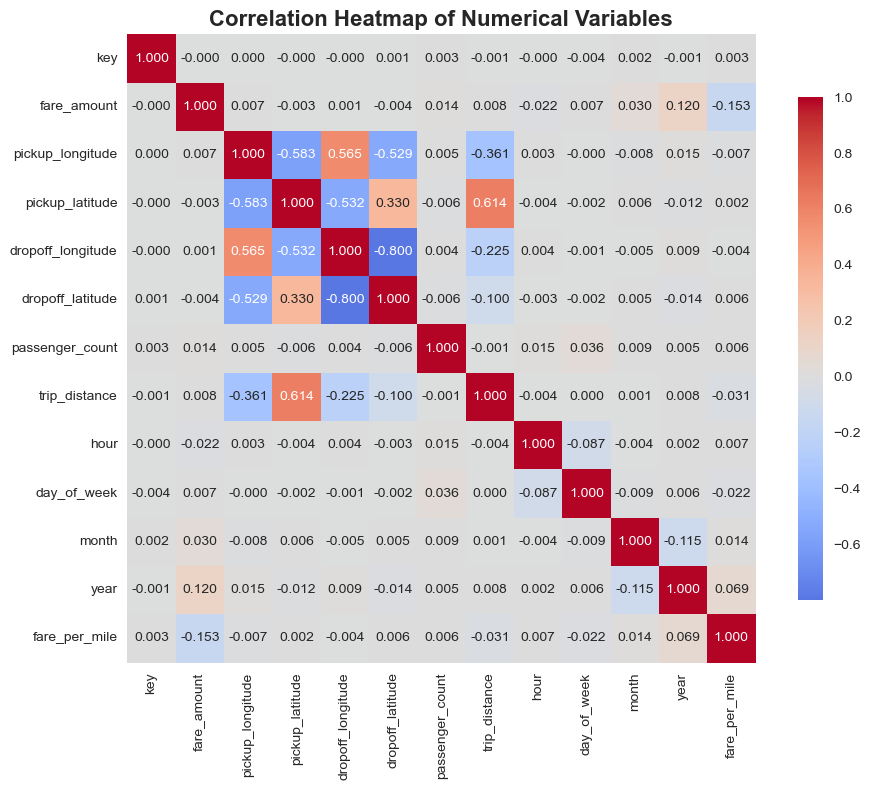

  ✅ Correlation heatmap saved as 'correlation_heatmap.png'


In [58]:
# Create correlation heatmap for numerical variables
print("\n🌡️ Creating correlation heatmap...")
plt.figure(figsize=(10, 8))

# Select numerical columns for correlation
numerical_cols = df_clean.select_dtypes(include=[np.number]).columns
correlation_matrix = df_clean[numerical_cols].corr()

# Create heatmap
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', center=0,
            square=True, fmt='.3f', cbar_kws={"shrink": .8})
plt.title('Correlation Heatmap of Numerical Variables', fontsize=16, fontweight='bold')
plt.tight_layout()
plt.savefig('correlation_heatmap.png', dpi=300, bbox_inches='tight')
plt.show()
print("  ✅ Correlation heatmap saved as 'correlation_heatmap.png'")


In [59]:
# Summary of new features
print("\n📋 FEATURE ENGINEERING SUMMARY")
print("=" * 35)
print(f"Original features: {len(df_original.columns)}")
print(f"Enhanced features: {len(df_clean.columns)}")
print(f"New features added: {len(df_clean.columns) - len(df_original.columns)}")

new_features = [col for col in df_clean.columns if col not in df_original.columns]
if new_features:
    print(f"New features: {', '.join(new_features)}")

# Save enhanced dataset
enhanced_filename = 'uber_data_enhanced.csv'
df_clean.to_csv(enhanced_filename, index=False)
print(f"\n💾 Enhanced dataset saved as '{enhanced_filename}'")
print("✅ Ready for Power BI import!")



📋 FEATURE ENGINEERING SUMMARY
Original features: 9
Enhanced features: 18
New features added: 9
New features: trip_distance, hour, day_of_week, day_name, month, year, is_peak_hour, is_weekend, time_period, fare_per_mile

💾 Enhanced dataset saved as 'uber_data_enhanced.csv'
✅ Ready for Power BI import!



⏰ TIME PATTERN ANALYSIS


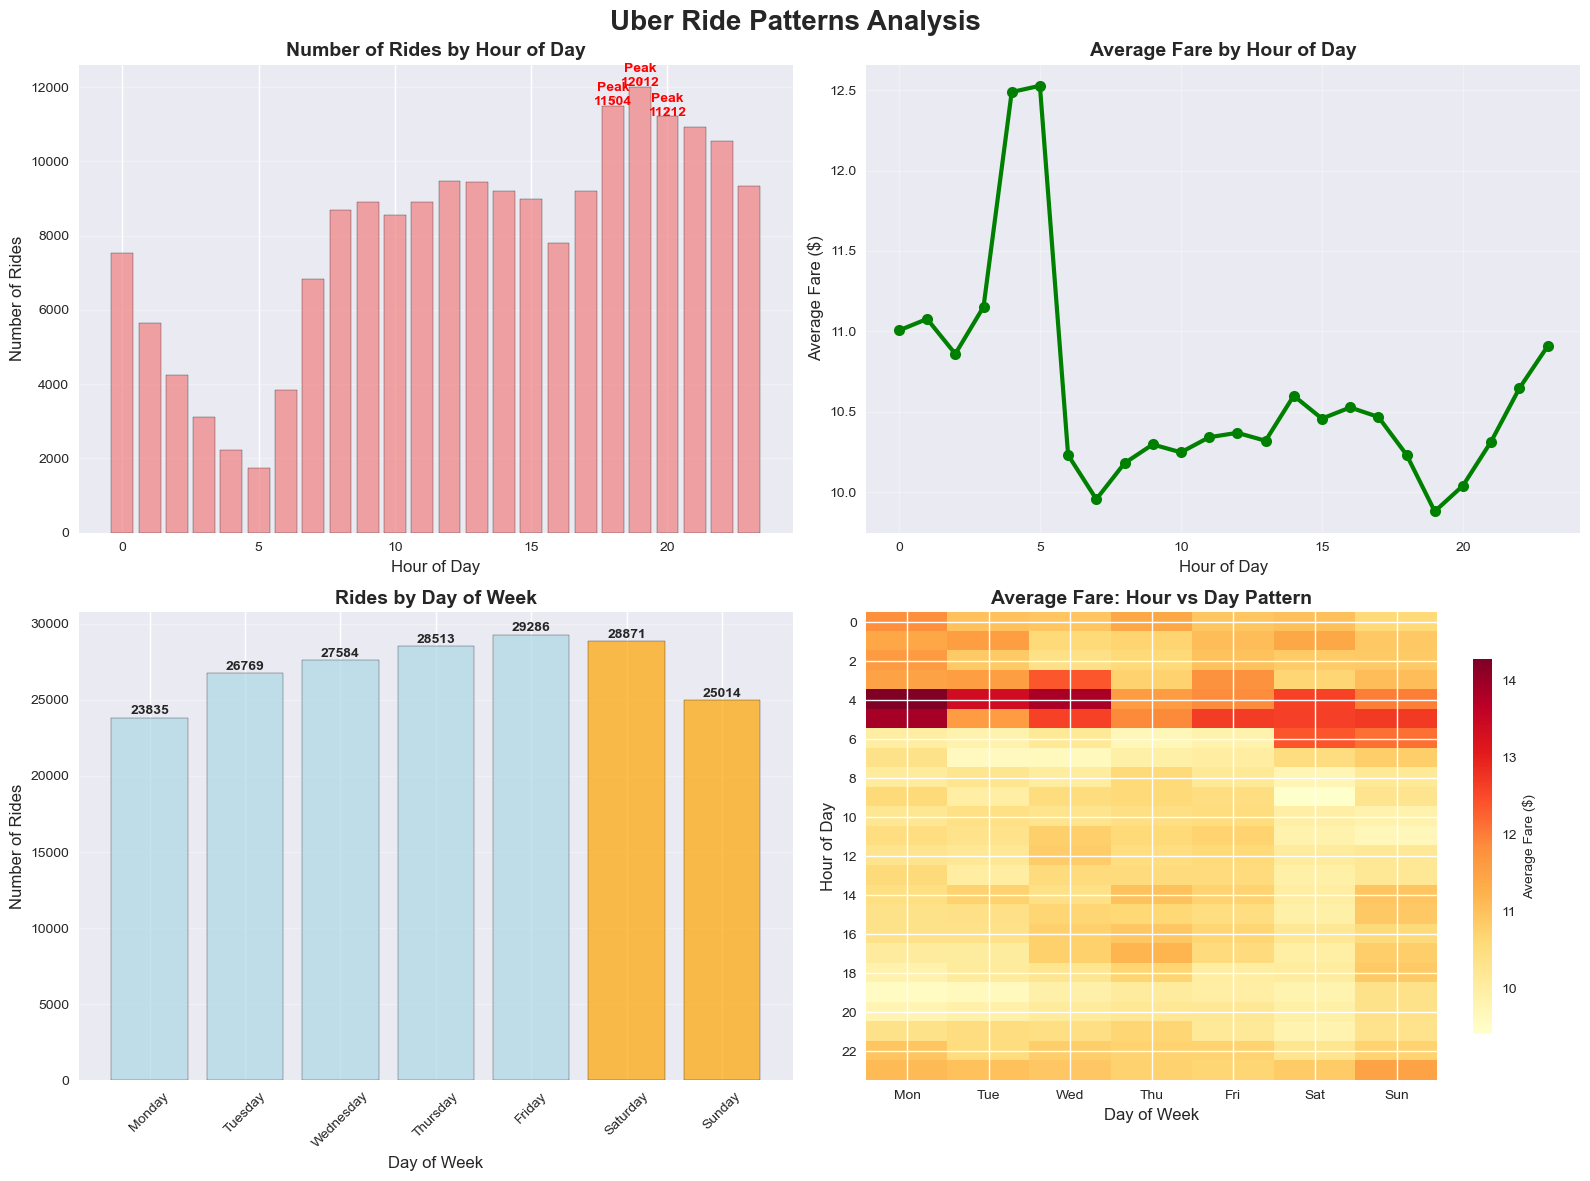

  ✅ Time patterns analysis saved as 'time_patterns_analysis.png'

📊 KEY TIME INSIGHTS:
🚀 BUSIEST HOURS:
  1. 19:00 - 12,012 rides
  2. 18:00 - 11,504 rides
  3. 20:00 - 11,212 rides

🚀 BUSIEST DAYS:
  1. Friday - 29,286 rides
  2. Saturday - 28,871 rides
  3. Thursday - 28,513 rides

💰 HIGHEST FARE HOURS:
  1. 05:00 - $12.53 average
  2. 04:00 - $12.49 average
  3. 03:00 - $11.15 average

📅 WEEKEND VS WEEKDAY:
  Weekday average fare: $10.45 (135,987.0 rides)
  Weekend average fare: $10.45 (53,885.0 rides)
  Weekend premium: $0.00 (+0.0%)

📅 MONTHLY ANALYSIS


<Figure size 1200x600 with 0 Axes>

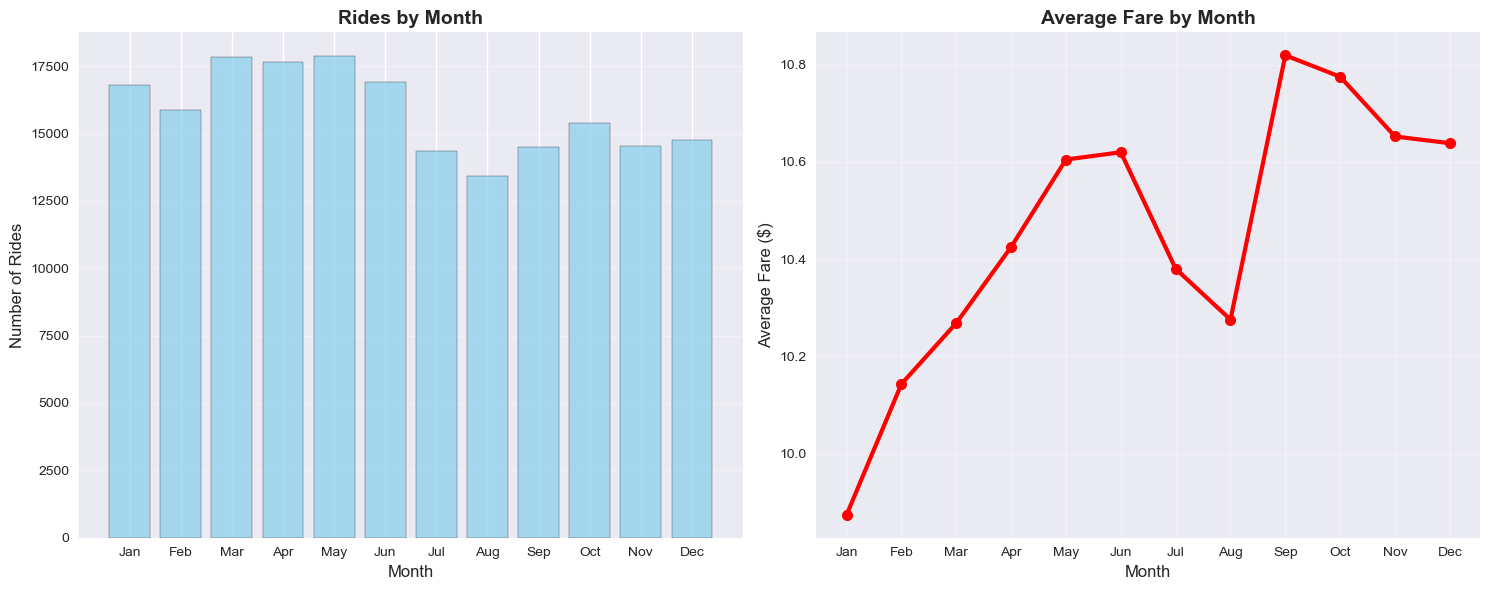

  ✅ Monthly analysis saved as 'monthly_analysis.png'
📈 Busiest month: May (17,863 rides)
💰 Highest fare month: Sep ($10.82 average)

📋 POWER BI READY SUMMARY
  Total Rides: 189,872
  Average Fare: 10.45
  Total Revenue: 1,984,328.15
  Average Distance: 17.14
  Most Common Passenger Count: 1

✅ Analysis complete!
📁 Files created:
  - uber_data_cleaned.csv
  - uber_data_enhanced.csv
  - fare_distribution.png
  - fare_boxplot.png
  - passenger_distribution.png
  - fare_relationships.png
  - correlation_heatmap.png
  - time_patterns_analysis.png
  - monthly_analysis.png


In [62]:
# Time Pattern Analysis for Power BI Insights

print("\n⏰ TIME PATTERN ANALYSIS")
print("=" * 40)

# Check if we have time-based features
if 'hour' in df_clean.columns and 'day_of_week' in df_clean.columns:
    
    # Create comprehensive time-based visualizations
    fig, axes = plt.subplots(2, 2, figsize=(16, 12))
    fig.suptitle('Uber Ride Patterns Analysis', fontsize=20, fontweight='bold', y=0.98)
    
    # 1. Rides by Hour of Day
    hourly_rides = df_clean.groupby('hour').size()
    hourly_fare = df_clean.groupby('hour')['fare_amount'].mean()
    
    ax1 = axes[0, 0]
    bars = ax1.bar(hourly_rides.index, hourly_rides.values, 
                   color='lightcoral', alpha=0.7, edgecolor='black')
    ax1.set_title('Number of Rides by Hour of Day', fontsize=14, fontweight='bold')
    ax1.set_xlabel('Hour of Day', fontsize=12)
    ax1.set_ylabel('Number of Rides', fontsize=12)
    ax1.grid(True, alpha=0.3, axis='y')
    
    # Highlight peak hours
    peak_hours = hourly_rides.nlargest(3)
    for hour in peak_hours.index:
        ax1.annotate(f'Peak\n{hourly_rides[hour]}', 
                    xy=(hour, hourly_rides[hour]), 
                    xytext=(hour, hourly_rides[hour] + 20),
                    ha='center', fontweight='bold', color='red',
                    arrowprops=dict(arrowstyle='->', color='red'))
    
    # 2. Average Fare by Hour
    ax2 = axes[0, 1]
    line = ax2.plot(hourly_fare.index, hourly_fare.values, 
                    marker='o', linewidth=3, markersize=8, color='green')
    ax2.set_title('Average Fare by Hour of Day', fontsize=14, fontweight='bold')
    ax2.set_xlabel('Hour of Day', fontsize=12)
    ax2.set_ylabel('Average Fare ($)', fontsize=12)
    ax2.grid(True, alpha=0.3)
    
    # 3. Rides by Day of Week
    day_names = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
    daily_rides = df_clean.groupby('day_of_week').size()
    
    ax3 = axes[1, 0]
    colors = ['lightblue' if i < 5 else 'orange' for i in range(7)]  # Different colors for weekdays/weekends
    bars = ax3.bar(range(7), daily_rides.values, color=colors, alpha=0.7, edgecolor='black')
    ax3.set_title('Rides by Day of Week', fontsize=14, fontweight='bold')
    ax3.set_xlabel('Day of Week', fontsize=12)
    ax3.set_ylabel('Number of Rides', fontsize=12)
    ax3.set_xticks(range(7))
    ax3.set_xticklabels(day_names, rotation=45)
    ax3.grid(True, alpha=0.3, axis='y')
    
    # Add value labels on bars
    for i, bar in enumerate(bars):
        height = bar.get_height()
        ax3.text(bar.get_x() + bar.get_width()/2., height + 5,
                f'{int(height)}', ha='center', va='bottom', fontweight='bold')
    
    # 4. Heatmap: Hour vs Day of Week
    ax4 = axes[1, 1]
    
    # Create pivot table for heatmap
    heatmap_data = df_clean.pivot_table(values='fare_amount', 
                                       index='hour',
                                       columns='day_of_week',
                                       aggfunc='mean')
    
    # Create heatmap
    im = ax4.imshow(heatmap_data.values, cmap='YlOrRd', aspect='auto')
    ax4.set_title('Average Fare: Hour vs Day Pattern', fontsize=14, fontweight='bold')
    ax4.set_xlabel('Day of Week', fontsize=12)
    ax4.set_ylabel('Hour of Day', fontsize=12)
    
    # Set ticks
    ax4.set_xticks(range(7))
    ax4.set_xticklabels(['Mon', 'Tue', 'Wed', 'Thu', 'Fri', 'Sat', 'Sun'])
    ax4.set_yticks(range(0, 24, 2))
    ax4.set_yticklabels(range(0, 24, 2))
    
    # Add colorbar
    cbar = plt.colorbar(im, ax=ax4, shrink=0.8)
    cbar.set_label('Average Fare ($)', fontsize=10)
    
    plt.tight_layout()
    plt.savefig('time_patterns_analysis.png', dpi=300, bbox_inches='tight')
    plt.show()
    print("  ✅ Time patterns analysis saved as 'time_patterns_analysis.png'")
    
    # Print insights
    print("\n📊 KEY TIME INSIGHTS:")
    print("=" * 25)
    
    # Peak hours
    top_3_hours = hourly_rides.nlargest(3)
    print("🚀 BUSIEST HOURS:")
    for i, (hour, rides) in enumerate(top_3_hours.items(), 1):
        time_str = f"{hour:02d}:00"
        print(f"  {i}. {time_str} - {rides:,} rides")
    
    # Peak days
    top_3_days = daily_rides.nlargest(3)
    print("\n🚀 BUSIEST DAYS:")
    for i, (day_num, rides) in enumerate(top_3_days.items(), 1):
        day_name = day_names[day_num]
        print(f"  {i}. {day_name} - {rides:,} rides")
    
    # Highest fare hours
    top_fare_hours = hourly_fare.nlargest(3)
    print("\n💰 HIGHEST FARE HOURS:")
    for i, (hour, fare) in enumerate(top_fare_hours.items(), 1):
        time_str = f"{hour:02d}:00"
        print(f"  {i}. {time_str} - ${fare:.2f} average")
    
    # Weekend vs Weekday analysis
    if 'is_weekend' in df_clean.columns:
        weekend_stats = df_clean[df_clean['is_weekend']]['fare_amount'].agg(['mean', 'count'])
        weekday_stats = df_clean[~df_clean['is_weekend']]['fare_amount'].agg(['mean', 'count'])
        
        print("\n📅 WEEKEND VS WEEKDAY:")
        print(f"  Weekday average fare: ${weekday_stats['mean']:.2f} ({weekday_stats['count']:,} rides)")
        print(f"  Weekend average fare: ${weekend_stats['mean']:.2f} ({weekend_stats['count']:,} rides)")
        
        fare_difference = weekend_stats['mean'] - weekday_stats['mean']
        print(f"  Weekend premium: ${fare_difference:.2f} ({fare_difference/weekday_stats['mean']*100:+.1f}%)")

else:
    print("❌ Time-based features not available - skipping time analysis")

# Monthly analysis if we have month data
if 'month' in df_clean.columns:
    print("\n📅 MONTHLY ANALYSIS")
    print("=" * 25)
    
    plt.figure(figsize=(12, 6))
    
    monthly_rides = df_clean.groupby('month').size()
    monthly_fare = df_clean.groupby('month')['fare_amount'].mean()
    
    # Create subplot for rides and fares
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 6))
    
    # Monthly rides
    months = ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 
              'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']
    
    bars1 = ax1.bar(monthly_rides.index, monthly_rides.values, 
                    color='skyblue', alpha=0.7, edgecolor='black')
    ax1.set_title('Rides by Month', fontsize=14, fontweight='bold')
    ax1.set_xlabel('Month', fontsize=12)
    ax1.set_ylabel('Number of Rides', fontsize=12)
    ax1.set_xticks(monthly_rides.index)
    ax1.set_xticklabels([months[i-1] for i in monthly_rides.index])
    ax1.grid(True, alpha=0.3, axis='y')
    
    # Monthly average fare
    line2 = ax2.plot(monthly_fare.index, monthly_fare.values, 
                     marker='o', linewidth=3, markersize=8, color='red')
    ax2.set_title('Average Fare by Month', fontsize=14, fontweight='bold')
    ax2.set_xlabel('Month', fontsize=12)
    ax2.set_ylabel('Average Fare ($)', fontsize=12)
    ax2.set_xticks(monthly_fare.index)
    ax2.set_xticklabels([months[i-1] for i in monthly_fare.index])
    ax2.grid(True, alpha=0.3)
    
    plt.tight_layout()
    plt.savefig('monthly_analysis.png', dpi=300, bbox_inches='tight')
    plt.show()
    print("  ✅ Monthly analysis saved as 'monthly_analysis.png'")
    
    # Print monthly insights
    busiest_month = monthly_rides.idxmax()
    highest_fare_month = monthly_fare.idxmax()
    
    print(f"📈 Busiest month: {months[busiest_month-1]} ({monthly_rides[busiest_month]:,} rides)")
    print(f"💰 Highest fare month: {months[highest_fare_month-1]} (${monthly_fare[highest_fare_month]:.2f} average)")

# Create summary statistics for Power BI
print("\n📋 POWER BI READY SUMMARY")
print("=" * 35)

summary_stats = {
    'Total Rides': len(df_clean),
    'Average Fare': df_clean['fare_amount'].mean(),
    'Total Revenue': df_clean['fare_amount'].sum(),
    'Average Distance': df_clean['trip_distance'].mean() if 'trip_distance' in df_clean.columns else 'N/A',
    'Most Common Passenger Count': df_clean['passenger_count'].mode()[0] if 'passenger_count' in df_clean.columns else 'N/A'
}

for key, value in summary_stats.items():
    if isinstance(value, float):
        print(f"  {key}: {value:,.2f}")
    else:
        print(f"  {key}: {value:,}" if isinstance(value, int) else f"  {key}: {value}")

print("\n✅ Analysis complete!")
print("📁 Files created:")
print("  - uber_data_cleaned.csv")
print("  - uber_data_enhanced.csv") 
print("  - fare_distribution.png")
print("  - fare_boxplot.png")
print("  - passenger_distribution.png")
print("  - fare_relationships.png")
print("  - correlation_heatmap.png")
print("  - time_patterns_analysis.png")
print("  - monthly_analysis.png")

In [63]:

# Assuming you already have a DataFrame called df_clean
Q1 = df_clean['trip_distance'].quantile(0.25)
Q3 = df_clean['trip_distance'].quantile(0.75)
IQR = Q3 - Q1

# Define bounds
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Identify outliers
outliers = df_clean[(df_clean['trip_distance'] < lower_bound) | (df_clean['trip_distance'] > upper_bound)]

print(f"Number of outliers: {len(outliers)}")
print("Top 5 outlier values:")
print(outliers['trip_distance'].sort_values(ascending=False).head())

Number of outliers: 14601
Top 5 outlier values:
91422     167995.333805
75851     148948.704199
144253     47924.154256
4949       46506.903695
32549      45809.142106
Name: trip_distance, dtype: float64


In [64]:
Q1 = df_clean['trip_distance'].quantile(0.25)
Q3 = df_clean['trip_distance'].quantile(0.75)
IQR = Q3 - Q1

upper_bound = Q3 + 1.5 * IQR
print(f"IQR Upper Bound: {upper_bound}")


IQR Upper Bound: 5.158805223657352


In [65]:
Q1_fare = df_clean['fare_amount'].quantile(0.25)
Q3_fare = df_clean['fare_amount'].quantile(0.75)
IQR_fare = Q3_fare - Q1_fare

# Calculate bounds
lower_bound_fare = Q1_fare - 1.5 * IQR_fare
upper_bound_fare = Q3_fare + 1.5 * IQR_fare

print(f"Lower Bound: {lower_bound_fare}")
print(f"Upper Bound: {upper_bound_fare}")


Lower Bound: -3.1499999999999986
Upper Bound: 21.25


In [66]:
outliers_fare = df_clean[
    (df_clean['fare_amount'] < lower_bound_fare) |
    (df_clean['fare_amount'] > upper_bound_fare)
]

print(f"Outlier count: {len(outliers_fare)}")
print(outliers_fare['fare_amount'].sort_values(ascending=False).head())



Outlier count: 14275
81559     47.83
85560     47.83
8455      47.83
30895     47.83
155032    47.83
Name: fare_amount, dtype: float64
